In [80]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv('gmm_data.csv')
dt=data.groupby('cust').sum()
dt=dt[['count','sum']]

In [109]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['sum'], y=label_cluster['count'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
       
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
   
    plt.legend(loc=legend_loc)
    plt.show()

In [110]:
# n_components로 미리 군집 개수 설정
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(dt)

gmm_labels
# GMM 후 클러스터링 레이블을 따로 설정
dt['cluster'] = gmm_labels

dt

,count,sum,cluster
cust,,,
M000419293,39,1926900.0,0
M000557840,49,2332838.0,0
M000871427,53,2183060.0,0
M000986912,48,1377870.0,0
M001248380,38,992100.0,0
...,...,...,...
M999227380,32,3449170.0,3
M999268192,24,783100.0,0
M999599111,8,1550082.0,0


In [111]:
dt.groupby('cluster').mean()

,count,sum
cluster,,
0,26.079033,1.182114e+06
1,129.078261,2.196331e+07
2,117.423819,7.319116e+06
3,60.863894,3.680371e+06
4,151.989655,1.390073e+07


In [112]:
dt.groupby('cluster').count()

,count,sum
cluster,,
0,3062,3062
1,230,230
2,1503,1503
3,2645,2645
4,580,580


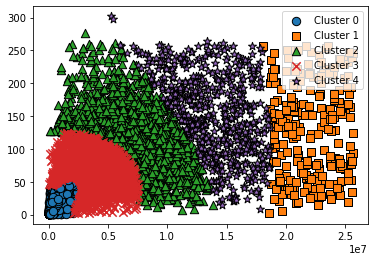

In [113]:
visualize_cluster_plot(gmm, dt, 'cluster',iscenter=False)